# Base

In [1]:
!gdown 1MknXcvOW7FhQrtLWYJkti6MwvZBkwWgu
!pip install rarfile
import tensorflow as tf
import rarfile
import numpy as np
import os
import shutil

folder_path = '/content/Dataset'
# Extract the rar file to the specified folder
with rarfile.RarFile("/content/NN_HW2_Face_Emotion.rar", 'r') as rar_ref:
    rar_ref.extractall(folder_path)



Downloading...
From: https://drive.google.com/uc?id=1MknXcvOW7FhQrtLWYJkti6MwvZBkwWgu
To: /content/NN_HW2_Face_Emotion.rar
100% 113M/113M [00:01<00:00, 70.0MB/s]


In [2]:
import tensorflow as tf
import cv2
import os

# Set your image dimensions
img_width, img_height = 128, 128

# Define your training and validation directories
train_dataset_path = "/content/Dataset/TRAIN"
tune_dataset_path = "/content/Dataset/TUNE"
data_dir = '/content/Dataset'
x_train = []
y_train = []


for i, folder_name in enumerate(os.listdir(train_dataset_path)):
    folder_path = os.path.join(train_dataset_path, folder_name)
    for file_name in os.listdir(folder_path):
        if file_name.lower().endswith((".jpg", ".png", ".jpeg")):
            img_path = os.path.join(folder_path, file_name)
            img = cv2.imread(img_path)

            if img is not None:
                # print(file_name)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, (img_width, img_height))
                img = img.astype("float32") /255
                img = cv2.resize(img, (128, 128))

                x_train.append(img)
                y_train.append(i)
            else:
                print(f"Error reading image: {file_name}")

x_tune = []
y_tune = []


for i, folder_name in enumerate(os.listdir(tune_dataset_path)):
    folder_path = os.path.join(tune_dataset_path, folder_name)
    for file_name in os.listdir(folder_path):
        if file_name.lower().endswith((".jpg", ".png", ".jpeg")):
            img_path = os.path.join(folder_path, file_name)
            img = cv2.imread(img_path)

            if img is not None:
                # print(file_name)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, (img_width, img_height))
                img = img.astype("float32") /255
                img = cv2.resize(img, (128, 128))

                x_tune.append(img)
                y_tune.append(i)
            else:
                print(f"Error reading image: {file_name}")

In [3]:
from keras.preprocessing.image import ImageDataGenerator

datagen_train = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True
)
datagen_train.fit(x_train)

datagen_tune = ImageDataGenerator()

datagen_tune.fit(x_tune)

In [4]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

from keras.utils import to_categorical
y_train_encoded= to_categorical(le.fit_transform(y_train), 8)
y_tune_encoded= to_categorical(le.fit_transform(y_tune), 8)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train_encoded, test_size=0.2, random_state=1)
X_train_tune, X_test_tune, Y_train_tune, Y_test_tune = train_test_split(x_tune, y_tune_encoded, test_size=0.2, random_state=1)

# Alexnet

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, Flatten, Dense, GaussianDropout, Dropout, Activation
model = Sequential()
# CONV BLOCK 1
model.add(Conv2D(16, (9, 9), input_shape=(128, 128, 3), padding='same', use_bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(GaussianDropout(0.2))
# CONV BLOCK 2
model.add(Conv2D(32, (7, 7), padding='same', use_bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(GaussianDropout(0.2))
# CONV BLOCK 3
model.add(Conv2D(64, (5, 5), padding='same', use_bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(GaussianDropout(0.2))
# CONV BLOCK 4
model.add(Conv2D(128, (3, 3), padding='same', use_bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(GaussianDropout(0.2))
# CONV BLOCK 5
model.add(Conv2D(128, (3, 3), padding='same', use_bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(GaussianDropout(0.2))
# FLATTEN
model.add(Flatten())
# DENSE 1
model.add(Dense(1024, use_bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
# DENSE 2
model.add(Dense(1024, use_bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
# OUTPUT

model.add(Dense(8, activation='softmax'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 128, 128, 16)      3888      
                                                                 
 batch_normalization_7 (Bat  (None, 128, 128, 16)      64        
 chNormalization)                                                
                                                                 
 activation_7 (Activation)   (None, 128, 128, 16)      0         
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 64, 64, 16)        0         
 g2D)                                                            
                                                                 
 gaussian_dropout_5 (Gaussi  (None, 64, 64, 16)        0         
 anDropout)                                                      
                                                      

In [ ]:
import tensorflow as tf
import keras

opt = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9,
                                     beta_2=0.999, epsilon=1e-08) #based on the article

model.compile(loss= 'categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
from keras.callbacks import  ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.9,
                              patience=4,
                              min_lr=0.0001, verbose=1)


# Train the model
history = model.fit(
    np.array(X_train), np.array(Y_train),
    validation_data=(np.array(X_test), np.array(Y_test)),
    epochs=30,
    callbacks=[reduce_lr],
    batch_size= 400
)



Epoch 1/30
16/16 [==============================] - 10s 387ms/step - loss: 2.6185 - accuracy: 0.1581 - val_loss: 2.0810 - val_accuracy: 0.1475 - lr: 0.0010
Epoch 2/30
16/16 [==============================] - 5s 328ms/step - loss: 2.3963 - accuracy: 0.1839 - val_loss: 2.2016 - val_accuracy: 0.1331 - lr: 0.0010
Epoch 3/30
16/16 [==============================] - 5s 328ms/step - loss: 2.0926 - accuracy: 0.2428 - val_loss: 1.9152 - val_accuracy: 0.2262 - lr: 0.0010
Epoch 4/30
16/16 [==============================] - 5s 321ms/step - loss: 1.8718 - accuracy: 0.2956 - val_loss: 1.7483 - val_accuracy: 0.2812 - lr: 0.0010
Epoch 5/30
16/16 [==============================] - 5s 327ms/step - loss: 1.7654 - accuracy: 0.3233 - val_loss: 1.6312 - val_accuracy: 0.3250 - lr: 0.0010
Epoch 6/30
16/16 [==============================] - 5s 325ms/step - loss: 1.6369 - accuracy: 0.3630 - val_loss: 1.6274 - val_accuracy: 0.3181 - lr: 0.0010
Epoch 7/30
16/16 [==============================] - 5s 329ms/step - l

50/50 [==============================] - 1s 9ms/step
Sensitivity: [0.47938144 0.785      0.44776119 0.32022472 0.53881279 0.46305419
 0.81944444 0.30687831]
Specificity: [0.8598862  0.98142857 0.96568978 0.93530239 0.87110789 0.95848246
 0.94219653 0.94542877]
Precision: 0.5473659890393402
Recall: 0.5275
F1 Score: 0.5278054849134617
AUC Score: 0.7262549802579118


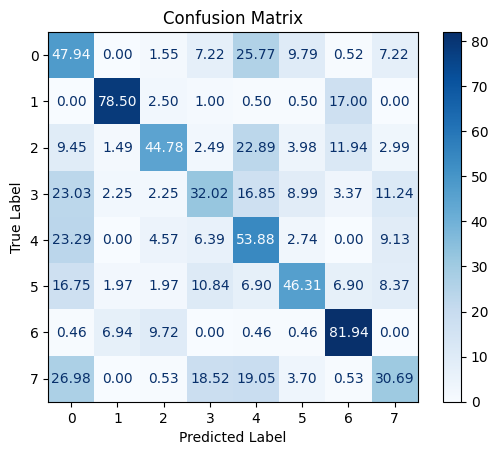

In [ ]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
from keras.utils import to_categorical

# Make predictions
y_pred = model.predict(np.array(X_test))
y_true = np.argmax(Y_test, axis=1)
y_pred_new = np.argmax(y_pred, axis=1)


# Calculate precision, recall, and F1 score
precision = precision_score(y_true, y_pred_new, average='weighted')
recall = recall_score(y_true, y_pred_new, average='weighted')
f1 = f1_score(y_true, y_pred_new, average='weighted')

# Calculate AUC score
auc_score = roc_auc_score(to_categorical(y_true), to_categorical(y_pred_new), multi_class='ovr')


# Create confusion matrix
cm = confusion_matrix(y_true, y_pred_new)

# Calculate sensitivity and specificity
true_positive = np.diag(cm)
false_positive = np.sum(cm, axis=0) - true_positive
false_negative = np.sum(cm, axis=1) - true_positive
true_negative = np.sum(cm) - (true_positive + false_positive + false_negative)

sensitivity = true_positive / (true_positive + false_negative)
specificity = true_negative / (true_negative + false_positive)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('AUC Score:', auc_score)

cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
import matplotlib.pyplot as plt
# classes = validation_dataset.class_names
cm_display = ConfusionMatrixDisplay(cm_percentage)
cm_display.plot(cmap='Blues', values_format=".2f")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

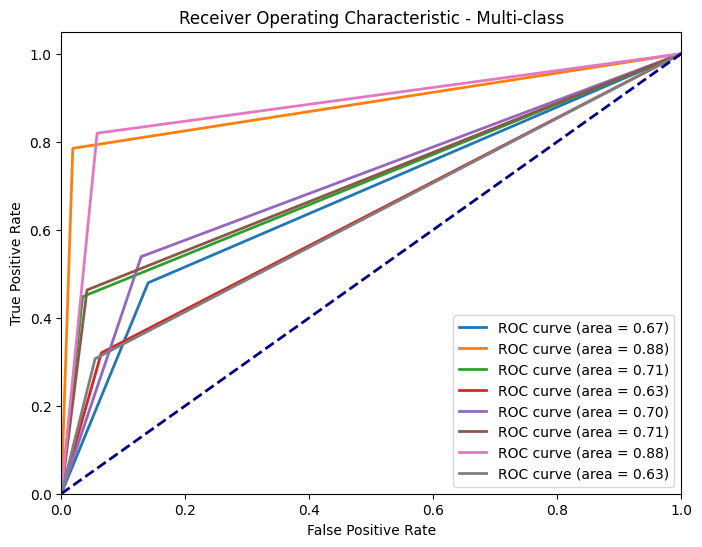

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(8):  # Assuming 8 classes, adjust accordingly
    fpr[i], tpr[i], _ = roc_curve(to_categorical(y_true)[:, i], to_categorical(y_pred_new)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(8):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Multi-class')
plt.legend(loc='lower right')
plt.show()

## fine tune

In [ ]:
from tensorflow.keras.models import Model

# Freeze 80% of the base model layers
num_layers = len(model.layers)
freeze_index = int(num_layers*0.8)

for layer in model.layers[:freeze_index]:
    layer.trainable = False

# Add custom classification layers
x = model.output
x = Flatten()(x)
x = Dense(32, activation='elu')(x)
x = Dense(16, activation='relu')(x)
predictions = Dense(8, activation='softmax')(x)

model_tune = Model(inputs=model.input, outputs=predictions)

legacy_opt = keras.optimizers.Adam(learning_rate=0.001)
model_tune.compile(optimizer=legacy_opt, loss='categorical_crossentropy', metrics=['accuracy'])

history_fine_tune = model_tune.fit(
    np.array(X_train_tune), np.array(Y_train_tune),
    validation_data=(np.array(X_test_tune), np.array(Y_test_tune)),
    epochs=16,
    batch_size=16
)


Epoch 1/16
80/80 [==============================] - 3s 14ms/step - loss: 2.0139 - accuracy: 0.2555 - val_loss: 1.9379 - val_accuracy: 0.2875
Epoch 2/16
80/80 [==============================] - 1s 8ms/step - loss: 1.8802 - accuracy: 0.3117 - val_loss: 1.8120 - val_accuracy: 0.2937
Epoch 3/16
80/80 [==============================] - 1s 8ms/step - loss: 1.7854 - accuracy: 0.3172 - val_loss: 1.7232 - val_accuracy: 0.3031
Epoch 4/16
80/80 [==============================] - 1s 9ms/step - loss: 1.7487 - accuracy: 0.3297 - val_loss: 1.7066 - val_accuracy: 0.3125
Epoch 5/16
80/80 [==============================] - 1s 9ms/step - loss: 1.7326 - accuracy: 0.3219 - val_loss: 1.6978 - val_accuracy: 0.2937
Epoch 6/16
80/80 [==============================] - 1s 9ms/step - loss: 1.7186 - accuracy: 0.3156 - val_loss: 1.6713 - val_accuracy: 0.3531
Epoch 7/16
80/80 [==============================] - 1s 8ms/step - loss: 1.7032 - accuracy: 0.3164 - val_loss: 1.6699 - val_accuracy: 0.3469
Epoch 8/16
80/80 [=

50/50 [==============================] - 1s 9ms/step
Sensitivity: [0.59793814 0.93       0.09452736 0.01685393 0.40639269 0.50246305
 0.75       0.34920635]
Specificity: [0.77311522 0.94571429 0.9413867  0.99507736 0.93917451 0.93700787
 0.91112717 0.94472006]
Precision: 0.44748598872944667
Recall: 0.464375
F1 Score: 0.42686969801489894
AUC Score: 0.6896690446216601


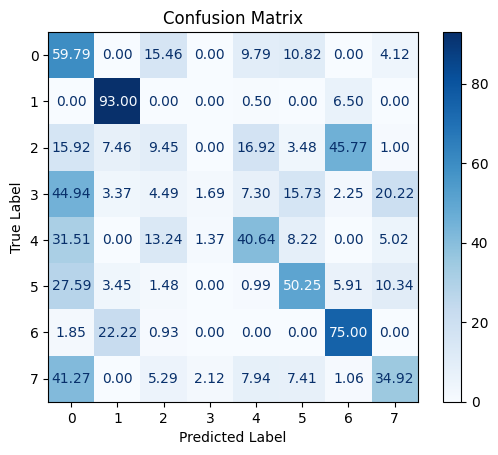

In [ ]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
from keras.utils import to_categorical

# Make predictions
y_pred = model_tune.predict(np.array(X_test))
y_true = np.argmax(Y_test, axis=1)
# print(y_true)
y_pred_new = np.argmax(y_pred, axis=1)

# Extract true labels from the validation dataset

# Calculate precision, recall, and F1 score
precision = precision_score(y_true, y_pred_new, average='weighted')
recall = recall_score(y_true, y_pred_new, average='weighted')
f1 = f1_score(y_true, y_pred_new, average='weighted')

# Calculate AUC score
auc_score = roc_auc_score(to_categorical(y_true), to_categorical(y_pred_new), multi_class='ovr')


# Create confusion matrix
cm = confusion_matrix(y_true, y_pred_new)

# Calculate sensitivity and specificity
true_positive = np.diag(cm)
false_positive = np.sum(cm, axis=0) - true_positive
false_negative = np.sum(cm, axis=1) - true_positive
true_negative = np.sum(cm) - (true_positive + false_positive + false_negative)

sensitivity = true_positive / (true_positive + false_negative)
specificity = true_negative / (true_negative + false_positive)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('AUC Score:', auc_score)

cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# classes = validation_dataset.class_names
cm_display = ConfusionMatrixDisplay(cm_percentage)
cm_display.plot(cmap='Blues', values_format=".2f")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

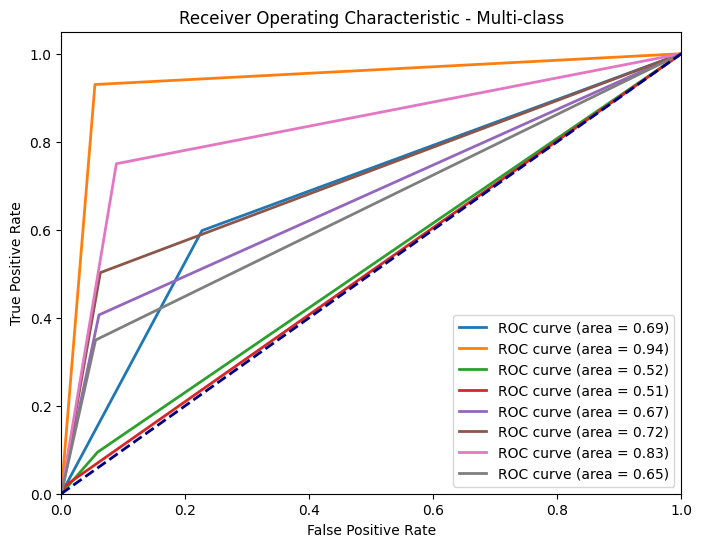

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(8):  # Assuming 8 classes, adjust accordingly
    fpr[i], tpr[i], _ = roc_curve(to_categorical(y_true)[:, i], to_categorical(y_pred_new)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(8):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Multi-class')
plt.legend(loc='lower right')
plt.show()

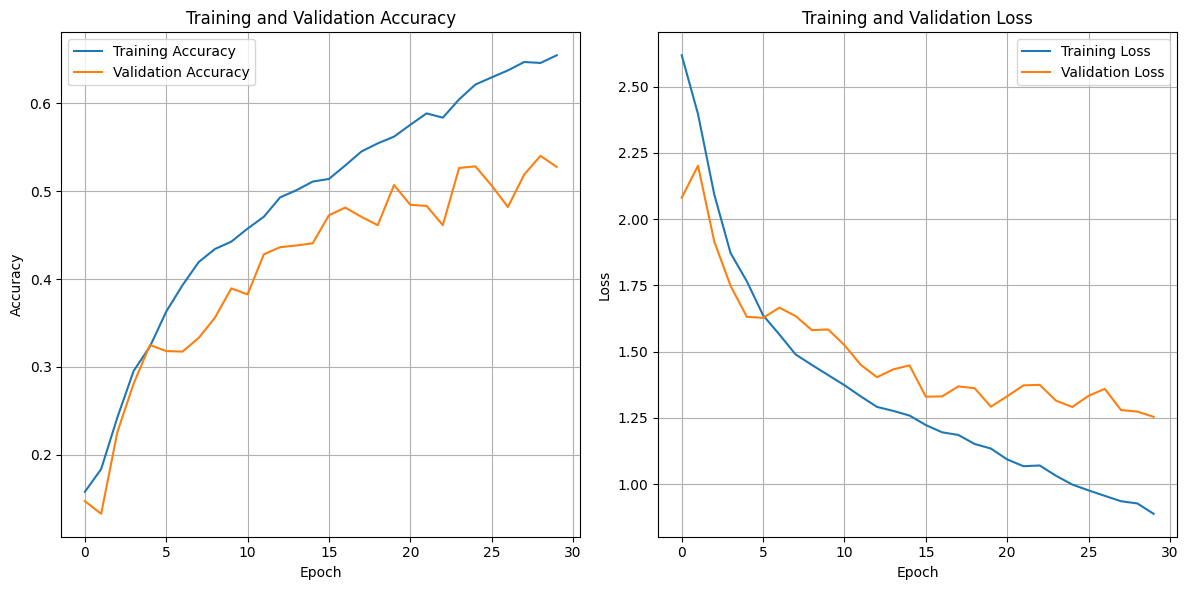

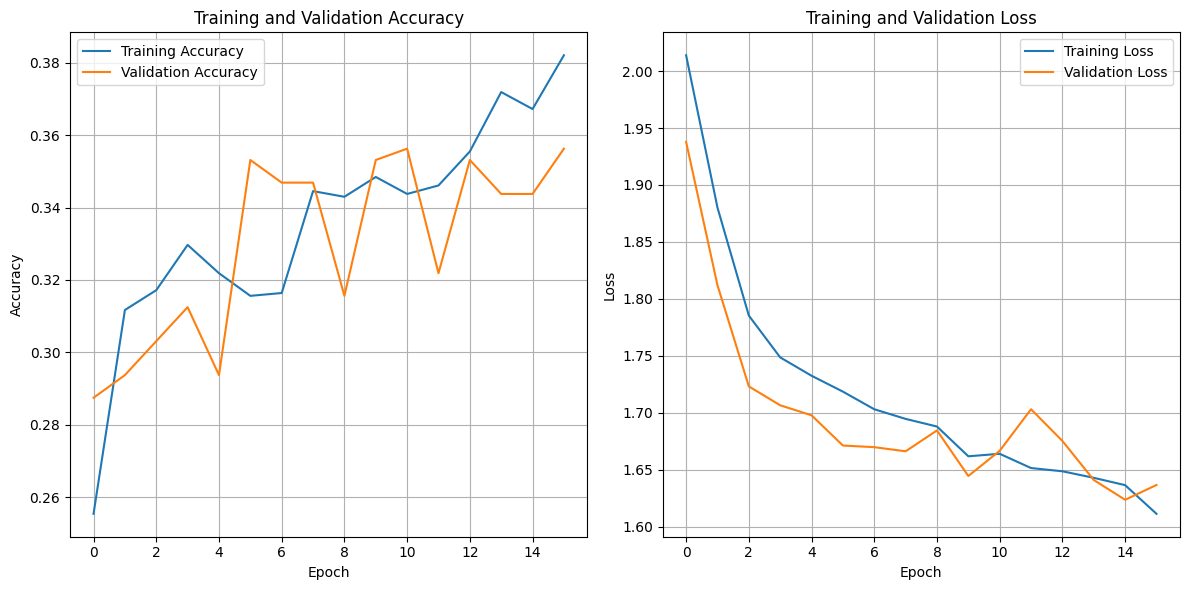

In [ ]:
import matplotlib.pyplot as plt

# Plot the training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.grid()
plt.tight_layout()
plt.show()


# Plot the training history_fine_tune
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_fine_tune.history['accuracy'], label='Training Accuracy')
plt.plot(history_fine_tune.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history_fine_tune.history['loss'], label='Training Loss')
plt.plot(history_fine_tune.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.grid()
plt.tight_layout()
plt.show()


#VGG

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, Flatten, Dense, GaussianDropout, Dropout, Activation
model = Sequential()
# CONV BLOCK 1
model.add(Conv2D(16, (3, 3), input_shape=(128, 128, 3), padding='same', use_bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(16, (3, 3), padding='same', use_bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.2))
# CONV BLOCK 2
model.add(Conv2D(32, (3, 3), padding='same', use_bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), padding='same', use_bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.2))
# CONV BLOCK 3
model.add(Conv2D(64, (3, 3), padding='same', use_bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same', use_bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.2))
# CONV BLOCK 4
model.add(Conv2D(128, (3, 3), padding='same', use_bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3), padding='same', use_bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.2))
# CONV BLOCK 5
model.add(Conv2D(128, (3, 3), padding='same', use_bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3), padding='same', use_bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.2))
# flatten
model.add(Flatten())
# dense 1
model.add(Dense(1024, use_bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
# dense 2
model.add(Dense(1024, use_bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
# OUTPUT
model.add(Dense(8, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 16)      432       
                                                                 
 batch_normalization (Batch  (None, 128, 128, 16)      64        
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 128, 128, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 16)      2304      
                                                                 
 batch_normalization_1 (Bat  (None, 128, 128, 16)      64        
 chNormalization)                                                
                                                                 
 activation_1 (Activation)   (None, 128, 128, 16)      0

In [6]:
import tensorflow as tf
import keras

opt = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9,
                                     beta_2=0.999, epsilon=1e-08) #based on the article

model.compile(loss= 'categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
from keras.callbacks import  ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.5,
                              patience=3,
                              min_lr=0.0001, verbose=1)


# Train the model
history = model.fit(
    np.array(X_train), np.array(Y_train),
    validation_data=(np.array(X_test), np.array(Y_test)),
    epochs=24,
    callbacks=[reduce_lr],
    batch_size= 32
)



Epoch 1/24
200/200 [==============================] - 37s 53ms/step - loss: 2.5007 - accuracy: 0.1548 - val_loss: 2.3894 - val_accuracy: 0.1350 - lr: 0.0010
Epoch 2/24
200/200 [==============================] - 10s 48ms/step - loss: 1.9855 - accuracy: 0.2467 - val_loss: 1.6828 - val_accuracy: 0.2969 - lr: 0.0010
Epoch 3/24
200/200 [==============================] - 10s 49ms/step - loss: 1.8021 - accuracy: 0.3038 - val_loss: 1.8122 - val_accuracy: 0.3156 - lr: 0.0010
Epoch 4/24
200/200 [==============================] - 10s 48ms/step - loss: 1.5968 - accuracy: 0.3738 - val_loss: 1.4896 - val_accuracy: 0.4013 - lr: 0.0010
Epoch 5/24
200/200 [==============================] - 10s 48ms/step - loss: 1.4428 - accuracy: 0.4377 - val_loss: 1.3854 - val_accuracy: 0.4475 - lr: 0.0010
Epoch 6/24
200/200 [==============================] - 10s 49ms/step - loss: 1.3690 - accuracy: 0.4706 - val_loss: 1.2947 - val_accuracy: 0.5206 - lr: 0.0010
Epoch 7/24
200/200 [==============================] - 11s 

50/50 [==============================] - 1s 11ms/step
Sensitivity: [0.44845361 0.91       0.58706468 0.4494382  0.50228311 0.63054187
 0.8287037  0.46560847]
Specificity: [0.90327169 0.98285714 0.95425304 0.91279887 0.95293266 0.93843951
 0.96748555 0.94046775]
Precision: 0.6130564072179905
Recall: 0.6075
F1 Score: 0.6084162555395903
AUC Score: 0.7734124909322009


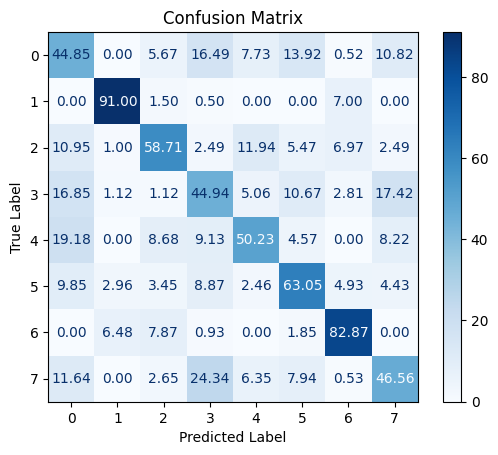

In [7]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
from keras.utils import to_categorical

# Make predictions
y_pred = model.predict(np.array(X_test))
y_true = np.argmax(Y_test, axis=1)
y_pred_new = np.argmax(y_pred, axis=1)


# Calculate precision, recall, and F1 score
precision = precision_score(y_true, y_pred_new, average='weighted')
recall = recall_score(y_true, y_pred_new, average='weighted')
f1 = f1_score(y_true, y_pred_new, average='weighted')

# Calculate AUC score
auc_score = roc_auc_score(to_categorical(y_true), to_categorical(y_pred_new), multi_class='ovr')


# Create confusion matrix
cm = confusion_matrix(y_true, y_pred_new)

# Calculate sensitivity and specificity
true_positive = np.diag(cm)
false_positive = np.sum(cm, axis=0) - true_positive
false_negative = np.sum(cm, axis=1) - true_positive
true_negative = np.sum(cm) - (true_positive + false_positive + false_negative)

sensitivity = true_positive / (true_positive + false_negative)
specificity = true_negative / (true_negative + false_positive)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('AUC Score:', auc_score)

cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

import matplotlib.pyplot as plt
# classes = validation_dataset.class_names
cm_display = ConfusionMatrixDisplay(cm_percentage)
cm_display.plot(cmap='Blues', values_format=".2f")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

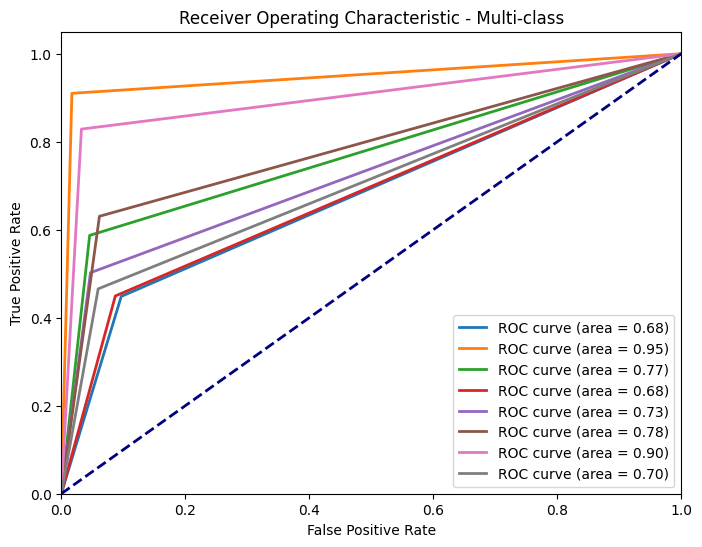

In [8]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(8):  # Assuming 8 classes, adjust accordingly
    fpr[i], tpr[i], _ = roc_curve(to_categorical(y_true)[:, i], to_categorical(y_pred_new)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(8):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Multi-class')
plt.legend(loc='lower right')
plt.show()

## fine tune

In [9]:
from tensorflow.keras.models import Model

# Freeze the base model layers
num_layers = len(model.layers)
freeze_index = int(num_layers*0.8)

for layer in model.layers[:freeze_index]:
    layer.trainable = False

# Add custom classification layers
x = model.output
x = Flatten()(x)
x = Dense(32, activation='elu')(x)
x = Dropout(0.5)(x)
# x = Dense(16, activation='elu')(x)
predictions = Dense(8, activation='softmax')(x)

# Create the final model
model_tune = Model(inputs=model.input, outputs=predictions)

# Compile the model with legacy optimizer
legacy_opt = keras.optimizers.Adam(learning_rate=0.001)  # You can adjust the learning rate as needed
model_tune.compile(optimizer=legacy_opt, loss='categorical_crossentropy', metrics=['accuracy'])

history_fine_tune = model_tune.fit(
    np.array(X_train_tune), np.array(Y_train_tune),
    validation_data=(np.array(X_test_tune), np.array(Y_test_tune)),
    callbacks=[reduce_lr],
    epochs=16,
    batch_size=64
)


Epoch 1/16
20/20 [==============================] - 5s 66ms/step - loss: 2.1072 - accuracy: 0.1391 - val_loss: 2.0501 - val_accuracy: 0.2469 - lr: 0.0010
Epoch 2/16
20/20 [==============================] - 1s 38ms/step - loss: 2.0354 - accuracy: 0.1953 - val_loss: 1.9890 - val_accuracy: 0.2531 - lr: 0.0010
Epoch 3/16
20/20 [==============================] - 1s 34ms/step - loss: 1.9769 - accuracy: 0.2242 - val_loss: 1.9472 - val_accuracy: 0.2688 - lr: 0.0010
Epoch 4/16
20/20 [==============================] - 1s 34ms/step - loss: 1.9193 - accuracy: 0.3000 - val_loss: 1.8983 - val_accuracy: 0.3688 - lr: 0.0010
Epoch 5/16
20/20 [==============================] - 1s 37ms/step - loss: 1.8756 - accuracy: 0.3227 - val_loss: 1.8577 - val_accuracy: 0.3844 - lr: 0.0010
Epoch 6/16
20/20 [==============================] - 1s 33ms/step - loss: 1.8230 - accuracy: 0.3562 - val_loss: 1.8154 - val_accuracy: 0.3906 - lr: 0.0010
Epoch 7/16
20/20 [==============================] - 1s 31ms/step - loss: 1.7

50/50 [==============================] - 1s 11ms/step
Sensitivity: [0.12886598 0.93       0.00995025 0.25842697 0.57990868 0.61083744
 0.84259259 0.38095238]
Specificity: [0.95092461 0.95357143 0.9992852  0.95218003 0.90152064 0.94130279
 0.75939306 0.94188519]
Precision: 0.498920075508481
Recall: 0.4775
F1 Score: 0.42754467391039186
AUC Score: 0.6963498269840244


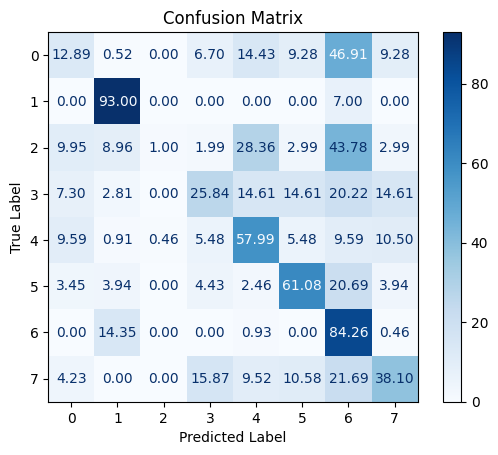

In [10]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
from keras.utils import to_categorical

# Make predictions
y_pred = model_tune.predict(np.array(X_test))
y_true = np.argmax(Y_test, axis=1)
# print(y_true)
y_pred_new = np.argmax(y_pred, axis=1)

# Extract true labels from the validation dataset

# Calculate precision, recall, and F1 score
precision = precision_score(y_true, y_pred_new, average='weighted')
recall = recall_score(y_true, y_pred_new, average='weighted')
f1 = f1_score(y_true, y_pred_new, average='weighted')

# Calculate AUC score
auc_score = roc_auc_score(to_categorical(y_true), to_categorical(y_pred_new), multi_class='ovr')


# Create confusion matrix
cm = confusion_matrix(y_true, y_pred_new)

# Calculate sensitivity and specificity
true_positive = np.diag(cm)
false_positive = np.sum(cm, axis=0) - true_positive
false_negative = np.sum(cm, axis=1) - true_positive
true_negative = np.sum(cm) - (true_positive + false_positive + false_negative)

sensitivity = true_positive / (true_positive + false_negative)
specificity = true_negative / (true_negative + false_positive)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('AUC Score:', auc_score)

cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# classes = validation_dataset.class_names
cm_display = ConfusionMatrixDisplay(cm_percentage)
cm_display.plot(cmap='Blues', values_format=".2f")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

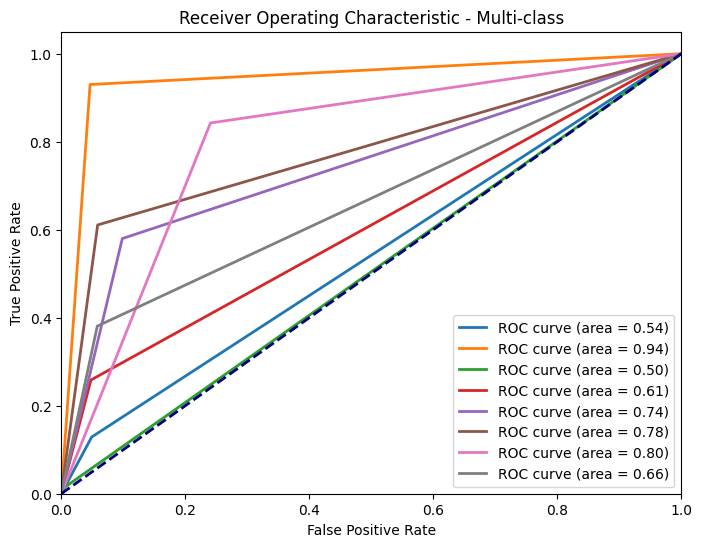

In [11]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(8):  # Assuming 8 classes, adjust accordingly
    fpr[i], tpr[i], _ = roc_curve(to_categorical(y_true)[:, i], to_categorical(y_pred_new)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(8):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Multi-class')
plt.legend(loc='lower right')
plt.show()

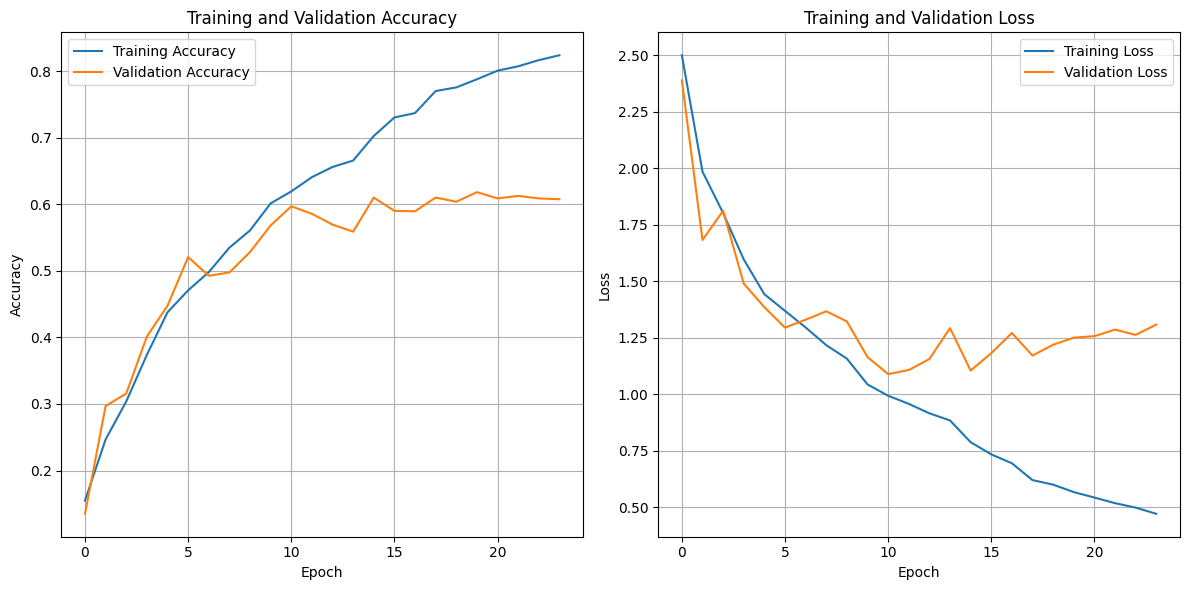

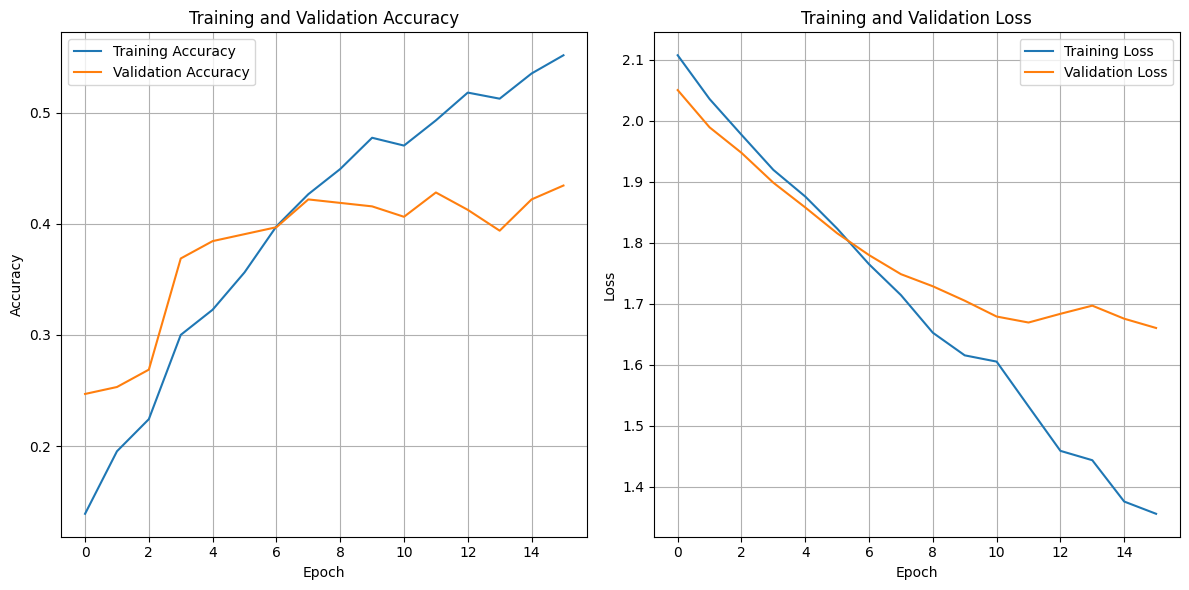

In [12]:
import matplotlib.pyplot as plt

# Plot the training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.grid()
plt.tight_layout()
plt.show()


# Plot the training history_fine_tune
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_fine_tune.history['accuracy'], label='Training Accuracy')
plt.plot(history_fine_tune.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history_fine_tune.history['loss'], label='Training Loss')
plt.plot(history_fine_tune.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.grid()
plt.tight_layout()
plt.show()


# MobileNet

In [30]:
import tensorflow as tf
from keras.layers import DepthwiseConv2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, Flatten, Dense, GaussianDropout, Dropout, Activation

def depth_conv_block(model, d, k, s):
    model.add(DepthwiseConv2D((k, k), strides=(s, s), padding='same', use_bias=False))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(d, (1, 1), padding='same', use_bias=False))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    return model

model = Sequential()
# CONV
alpha = 1
    # CONV
model.add(Conv2D(int(32 * alpha), (3, 3), padding='same', use_bias=False, strides=(2, 2), input_shape=(128, 128, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
# DEPTHWISE CONVS
model = depth_conv_block(model, int(64 * alpha), 3, 1)

model = depth_conv_block(model, int(128 * alpha), 3, 2)
model = depth_conv_block(model, int(128 * alpha), 3, 1)

model = depth_conv_block(model, int(256 * alpha), 3, 2)
model = depth_conv_block(model, int(256 * alpha), 3, 1)

model = depth_conv_block(model, int(512 * alpha), 3, 2)
model = depth_conv_block(model, int(512 * alpha), 3, 1)
model = depth_conv_block(model, int(512 * alpha), 3, 1)
model = depth_conv_block(model, int(512 * alpha), 3, 1)
model = depth_conv_block(model, int(512 * alpha), 3, 1)
model = depth_conv_block(model, int(512 * alpha), 3, 1)

model = depth_conv_block(model, int(1024 * alpha), 3, 2)
model = depth_conv_block(model, int(1024 * alpha), 3, 1)
# FLATTEN
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.3))
# OUTPUT
model.add(Dense(8, activation='softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_66 (Conv2D)          (None, 64, 64, 32)        864       
                                                                 
 batch_normalization_120 (B  (None, 64, 64, 32)        128       
 atchNormalization)                                              
                                                                 
 activation_120 (Activation  (None, 64, 64, 32)        0         
 )                                                               
                                                                 
 depthwise_conv2d_52 (Depth  (None, 64, 64, 32)        288       
 wiseConv2D)                                                     
                                                                 
 batch_normalization_121 (B  (None, 64, 64, 32)        128       
 atchNormalization)                                   

In [31]:
import tensorflow as tf
import keras

opt = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9,
                                     beta_2=0.999, epsilon=1e-08) #based on the article

model.compile(loss= 'categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
from keras.callbacks import  ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.8,
                              patience=2,
                              min_lr=0.00001, verbose=1)


# Train the model
history = model.fit(
    np.array(X_train), np.array(Y_train),
    validation_data=(np.array(X_test), np.array(Y_test)),
    epochs=24,
    callbacks=[reduce_lr],
    batch_size= 8
)


Epoch 1/24
800/800 [==============================] - 29s 22ms/step - loss: 2.0190 - accuracy: 0.2097 - val_loss: 1.7587 - val_accuracy: 0.2581 - lr: 0.0010
Epoch 2/24
800/800 [==============================] - 15s 19ms/step - loss: 1.7051 - accuracy: 0.2909 - val_loss: 1.6252 - val_accuracy: 0.3187 - lr: 0.0010
Epoch 3/24
800/800 [==============================] - 16s 20ms/step - loss: 1.5456 - accuracy: 0.3592 - val_loss: 1.6567 - val_accuracy: 0.3519 - lr: 0.0010
Epoch 4/24
800/800 [==============================] - 16s 20ms/step - loss: 1.4472 - accuracy: 0.4161 - val_loss: 1.4093 - val_accuracy: 0.4394 - lr: 0.0010
Epoch 5/24
800/800 [==============================] - 15s 19ms/step - loss: 1.3711 - accuracy: 0.4522 - val_loss: 1.3976 - val_accuracy: 0.4613 - lr: 0.0010
Epoch 6/24
800/800 [==============================] - 15s 19ms/step - loss: 1.3349 - accuracy: 0.4700 - val_loss: 1.4068 - val_accuracy: 0.4619 - lr: 0.0010
Epoch 7/24
798/800 [============================>.] - ETA:

## fine tune

In [32]:
from tensorflow.keras.models import Model

# Freeze 30% of the base model layers
num_layers = len(model.layers)
freeze_index = int(num_layers*0.8)

for layer in model.layers[:freeze_index]:
    layer.trainable = False

# Add custom classification layers
x = model.output
x = Flatten()(x)
x = Dense(32, activation='elu')(x)
x = Dense(16, activation='relu')(x)
predictions = Dense(8, activation='softmax')(x)

# Create the final model
model_tune = Model(inputs=model.input, outputs=predictions)

# Compile the model with legacy optimizer
legacy_opt = keras.optimizers.Adam(learning_rate=0.001)  # You can adjust the learning rate as needed
model_tune.compile(optimizer=legacy_opt, loss='categorical_crossentropy', metrics=['accuracy'])

history_fine_tune = model_tune.fit(
    np.array(X_train_tune), np.array(Y_train_tune),
    validation_data=(np.array(X_test_tune), np.array(Y_test_tune)),
    epochs=16,
    callbacks=[reduce_lr],
    batch_size=4
)


Epoch 1/16
320/320 [==============================] - 8s 12ms/step - loss: 1.9561 - accuracy: 0.3172 - val_loss: 1.8367 - val_accuracy: 0.3750 - lr: 0.0010
Epoch 2/16
320/320 [==============================] - 3s 8ms/step - loss: 1.7115 - accuracy: 0.4062 - val_loss: 1.7202 - val_accuracy: 0.3781 - lr: 0.0010
Epoch 3/16
320/320 [==============================] - 3s 9ms/step - loss: 1.6041 - accuracy: 0.4430 - val_loss: 1.6673 - val_accuracy: 0.3844 - lr: 0.0010
Epoch 4/16
320/320 [==============================] - 3s 10ms/step - loss: 1.5125 - accuracy: 0.4711 - val_loss: 1.6769 - val_accuracy: 0.3781 - lr: 0.0010
Epoch 5/16
318/320 [============================>.] - ETA: 0s - loss: 1.4267 - accuracy: 0.5079
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.000800000037997961.
320/320 [==============================] - 4s 11ms/step - loss: 1.4273 - accuracy: 0.5070 - val_loss: 1.7173 - val_accuracy: 0.3875 - lr: 0.0010
Epoch 6/16
320/320 [==============================] - 3s 10ms/

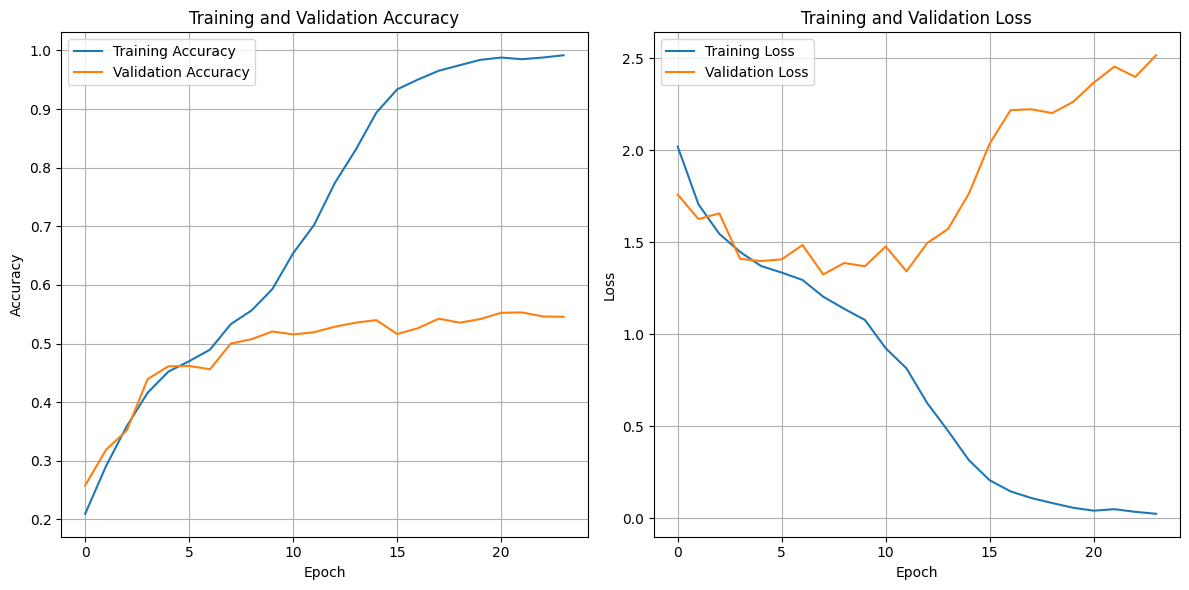

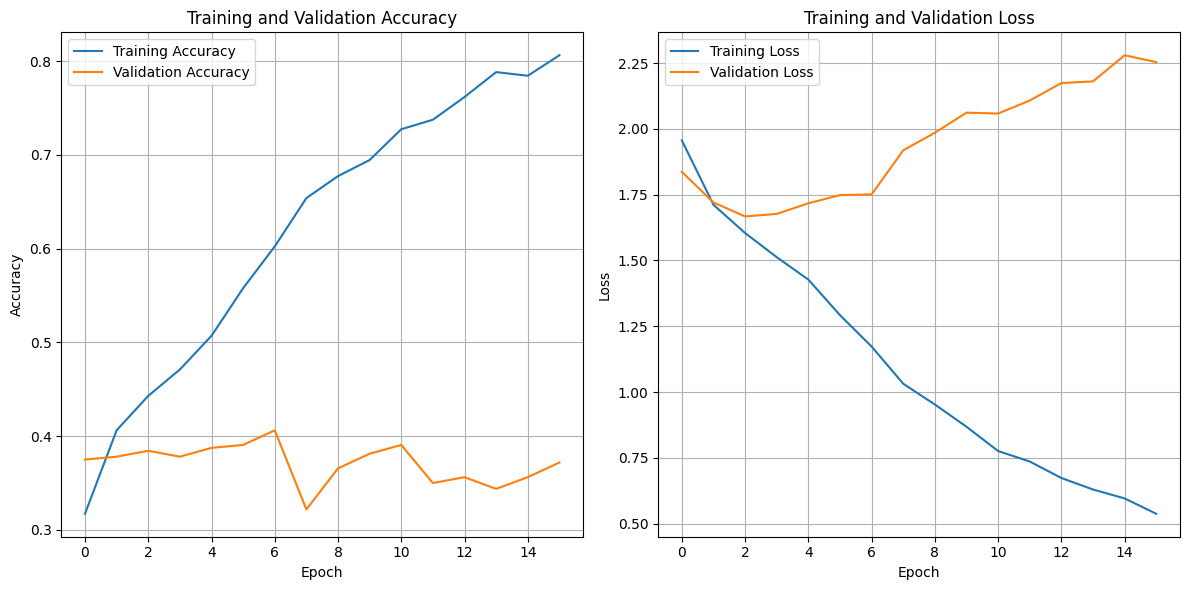

In [33]:
import matplotlib.pyplot as plt

# Plot the training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.grid()
plt.tight_layout()
plt.show()


# Plot the training history_fine_tune
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_fine_tune.history['accuracy'], label='Training Accuracy')
plt.plot(history_fine_tune.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history_fine_tune.history['loss'], label='Training Loss')
plt.plot(history_fine_tune.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.grid()
plt.tight_layout()
plt.show()
